# Стратегия взаимодействия клиентами фитнес центра  «Культурист-датасаентист»

**Задача исследования:**
провести анализ и подготовить план действий по удержанию клиентов.

**Описание данных:** 


**'Churn'** — факт оттока в текущем месяце;  
**'Gender'** — пол;  
**'Near_Location'**  — проживание или работа в районе, где находится фитнес-центр;  
**'Partner'** — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);  
**Promo_friends** — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);  
**'Phone'** — наличие контактного телефона;
'Age' — возраст;
'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).




**Информация о текущем статусе абонемента клиента:**
**'Contract_period'**  — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);  
**'Month_to_end_contract'** — срок до окончания текущего действующего абонемента (в месяцах);  
**'Group_visits'** — факт посещения групповых занятий;  
**'Avg_class_frequency_total'** — средняя частота посещений в неделю за все время с начала действия абонемента;  
**'Avg_class_frequency_current_month'** — средняя частота посещений в неделю за предыдущий месяц;  
**'Avg_additional_charges_total'** — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Шаг 1. Загрузите данные

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gym = pd.read_csv('/datasets/gym_churn.csv')

In [3]:
gym.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


**Вывод**
Датасет загружен, переходим к подготовке данных для анализа

## Шаг 2. Проведите исследовательский анализ данных (EDA)

In [4]:
print('Размер датасета:',gym.shape)
print(gym.head(5))

Размер датасета: (4000, 14)
   gender  Near_Location  Partner  Promo_friends  Phone  Contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   Group_visits  Age  Avg_additional_charges_total  Month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26                    198.362265                    1.0   

   Lifetime  Avg_class_frequency_total  Avg_class_fr

**Категориальные признаки:** 
'Gender','Near_Location','Partner','Promo_friends','Phine','Contract_period','Group_visits','Churn','Month_to_end_contract','Lifetime'

**Числовые признаки:**  
'Age','Avg_additional_charges_total',,'Avg_class_frequency_total','Avg_class_frequency_current_month'

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


In [6]:
gym.describe()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [7]:
gym.isnull().sum()

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64

Все признаки на месте, стандартные отклонения и средние посчитаны с помощью метода describe 
Пропусков в датасете не обнаружено

In [8]:
gym_group = gym.groupby('Churn').mean().reset_index()

In [9]:
gym_group

,Churn,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


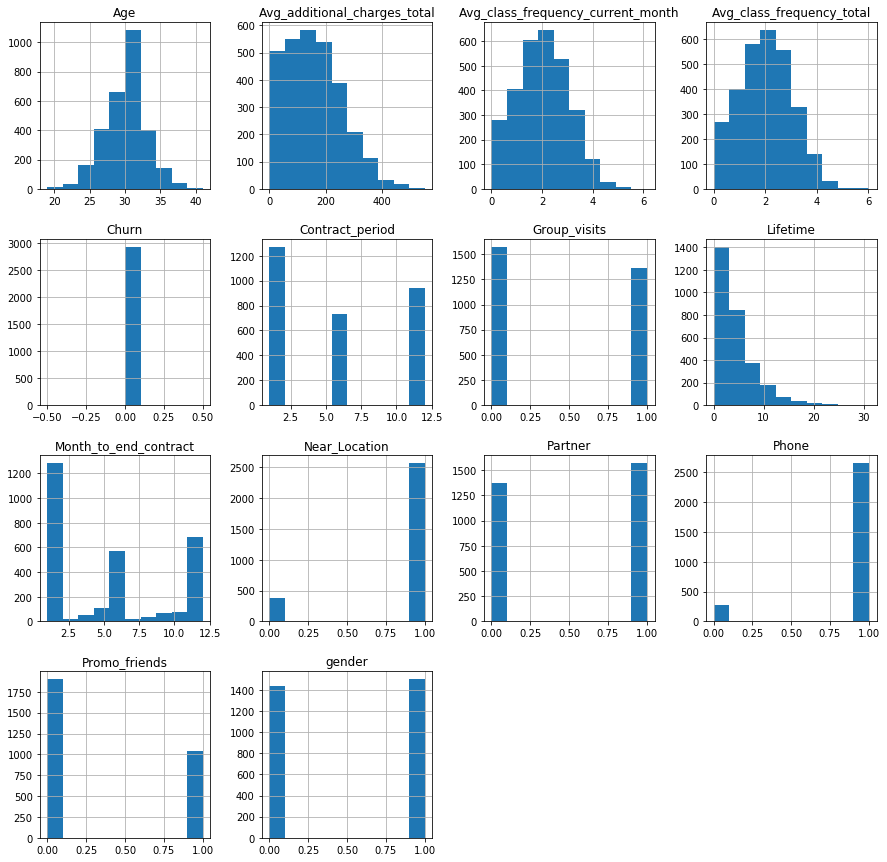

In [10]:
gym.query('Churn ==0').hist(figsize = (15,15))
plt.show()

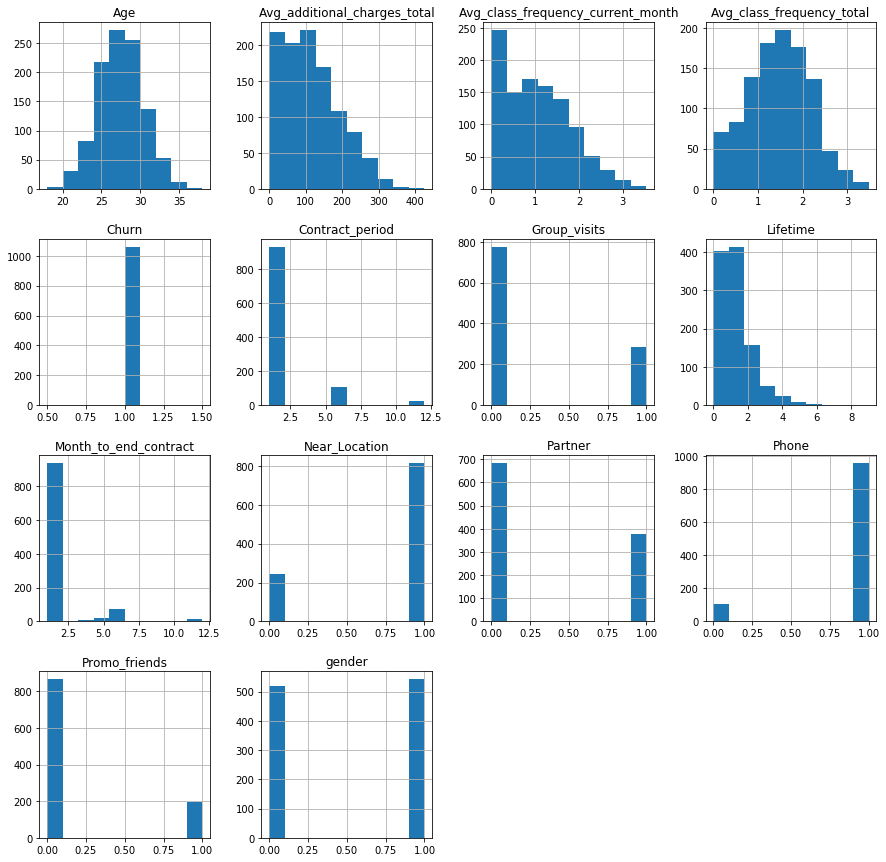

In [11]:
gym.query('Churn ==1').hist(figsize = (15,15))
plt.show()

**Из гистограммы для ушедших людей можно заметить:**

Отток наиболее распространен среди категории 25-30 лет  
Среднее количество посещений в неделю за все время абонемента колеблется между значениями  1-2  
Эти люди в основном с контрактом на 1 месяц
У этих людей в основном срок контракта оставшегося не превышал месяца  
В основном они проживали рядом или работали  
Большинство из них посещали групповые занятия
БОльшее количество из них пришли в зал сами а не по рекомендации  
Имеется в большинстве случаев их мобильный телефон  
А также большинство ушедших людей пришли не из компании пертнера фитнеса  
В основном ушли люди, которые не со сроком обращения в фитнес-клуб не более 2 месяцев


**В отличие от ушедших людей для оставшихся характерны следующие отличия:**  

Средний возраст 30-35  
2 раза в неделю среднее количество посещений  
Также срок контракта хоть в большинстве случаев и 1 месяц, но больше намного долгосрочных контрактов чем в ушедшей группе  

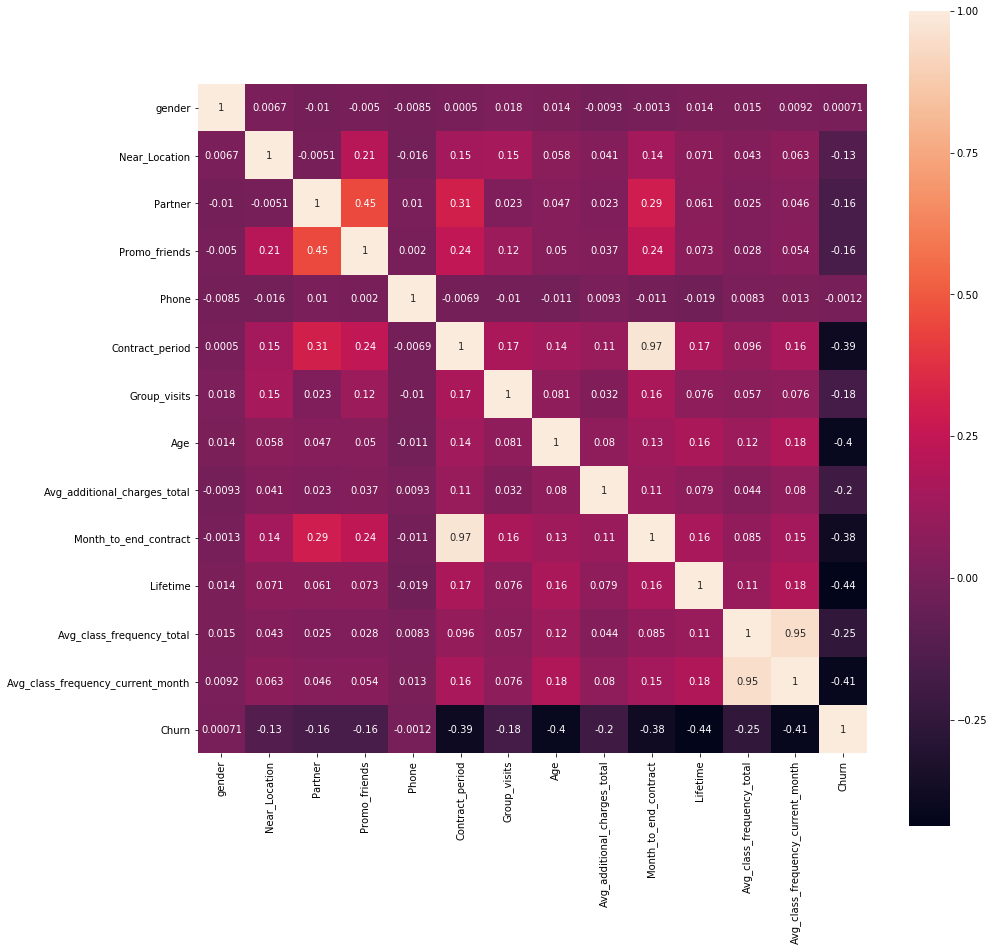

In [14]:

corr_m = gym.corr()
plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square=True,annot = True)
plt.show()

По матрице корреляций можно заметить очень большую зависимость (0,97) между признаками 'Month_to_end_contract' и 'Contract_period', что в принципе логично, поскольку метрики обратные
Других сильных зависимостей не наблюдается

**Вывод**  
Данные происледованы, разделены по группам, а также построена матрица корреляций, можно переходить к построению модели прогнозирования